In [188]:
import numpy as np

def min_max_normalize_ochl(arr):

    highmax=max(df_terminated['HighPrice'])
    lowmin=min(df_terminated['LowPrice'])
    norm_factor=(highmax-lowmin)
    norm_arr=(np.array(arr)-lowmin)/norm_factor
    return norm_arr

def min_max_normalize_ma(arr):

    highmax=max(arr)
    lowmin=min(arr)
    norm_factor=(highmax-lowmin)
    norm_arr=(np.array(arr)-lowmin)/norm_factor
    return norm_arr

def make_chart(df_terminated,img_w,img_h,term,linewidth,alpha,colors):
    date_term=int(img_w/term)
    candle_width=date_term
    ma5=min_max_normalize_ma(df_terminated['MA5'])
    ma10=min_max_normalize_ma(df_terminated['MA10'])
    ma20=min_max_normalize_ma(df_terminated['MA20'])
    high=min_max_normalize_ochl(df_terminated['HighPrice'])
    low=min_max_normalize_ochl(df_terminated['LowPrice'])
    open=min_max_normalize_ochl(df_terminated['OpeningPrice'])
    close=min_max_normalize_ochl(df_terminated['TradePrice'])


    ma5=np.array(ma5*(img_h-1),dtype=np.int8)
    ma10=np.array(ma10*(img_h-1),dtype=np.int8)
    ma20=np.array(ma20*(img_h-1),dtype=np.int8)
    high=np.array(high*(img_h-1),dtype=np.int8)
    low=np.array(low*(img_h-1),dtype=np.int8)
    open=np.array(open*(img_h),dtype=np.int8)
    close=np.array(close*(img_h-1),dtype=np.int8)


    ma5=(img_h-1)-ma5
    ma10=(img_h-1)-ma10
    ma20=(img_h-1)-ma20
    high=(img_h-1)-high
    low=(img_h-1)-low
    open=(img_h-1)-open
    close=(img_h-1)-close

    # Draw Chart
    chart=np.zeros((img_h,img_w,3),dtype=np.int16)
    close_yesterday=0
    today=0
    for i in range(term):
        if close[i]>close_yesterday:
            color=colors['r']
        elif close[i]<close_yesterday:
            color=colors['b']
        elif close[i]==close_yesterday:
            color=colors['g']
        close_yesterday=close[i]

        chart[ma5[i]:ma5[i]+3,today+date_term//2,:]+=(128,128,0)
        chart[ma10[i]:ma10[i]+3,today+date_term//2,:]+=(128,0,128)
        chart[ma20[i]:ma20[i]+3,today+date_term//2,:]+=(0,128,128)

        chart[ma5[i],today+date_term//2-3:today+date_term//2+3,:]+=(128,128,0)
        chart[ma10[i],today+date_term//2-3:today+date_term//2+3,:]+=(128,0,128)
        chart[ma20[i],today+date_term//2-3:today+date_term//2+3,:]+=(0,128,128)

        # chart[ma5[i]:ma5[i]+3,today+date_term//2-3:today+date_term//2+3,:]+=(64,64,0)
        # chart[ma10[i]:ma10[i]+3,today+date_term//2-3:today+date_term//2+3,:]+=(64,0,64)
        # chart[ma20[i]:ma20[i]+3,today+date_term//2-3:today+date_term//2+3,:]+=(0,64,64)

        chart[ma5[i],:,:]+=(16,16,0)
        chart[ma10[i],:,:]+=(16,0,16)
        chart[ma20[i],:,:]+=(0,16,16)


        # Draw high-low
        col_start=today+date_term//2-linewidth//2
        col_finish=today+date_term//2+linewidth//2
        chart[high[i]:low[i]+1,col_start:col_finish,color]=255*alpha

        # Draw open-close
        col_start=today+date_term//2-candle_width//2
        col_finish=today+date_term//2+candle_width//2
        chart[min(open[i],close[i]):max(open[i],close[i])+1,col_start:col_finish,color]=255*alpha

        # # Draw ma line
        # chart[ma5[i],today+date_term//2,:]=(255,255,0)
        # chart[ma10[i],today+date_term//2,:]=(255,0,255)
        # chart[ma20[i],today+date_term//2,:]=(0,255,255)
        # chart[ma5[i]:ma5[i]+3,today+date_term//2-3:today+date_term//2+3,:]-=(63,63,0)
        # chart[ma10[i]:ma10[i]+3,today+date_term//2-3:today+date_term//2+3,:]-=(63,0,63)
        # chart[ma20[i]:ma20[i]+3,today+date_term//2-3:today+date_term//2+3,:]-=(0,63,63)
        # print(ma20[i])

        today+=date_term
    return chart

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


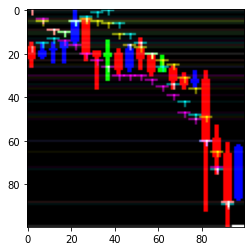

In [189]:
import matplotlib.pyplot as plt
chart=make_chart(df_terminated,img_w,img_h,term,linewidth,1,colors)
plt.imshow(chart)

In [190]:
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from time import sleep

COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','VET','LINK','THETA','CRO','TRX','GLM','XTZ','ATOM']
# COIN_LIST=['VET','LINK','THETA','CRO','TRX','GLM','XTZ','ATOM'] # EMC2'

img_w=100
img_h=100
term=20
linewidth=2
alpha=1
colors={'r':0,'b':2,'g':1}
train_val_split_rate=0.9

total=0
tot_up=0
tot_down=0
for coin in COIN_LIST:
    # for time_unit in ['day', '240']:
    for time_unit in ['240']: #'day',

        dataset_path=f'/content/{time_unit}/'
        df = pd.read_csv(f'/content/drive/MyDrive/coin_data/price/Upbit_{coin}_{time_unit}_Data.csv')

        df['MA5'] = df['TradePrice'].rolling(5).mean()
        df['MA10'] = df['TradePrice'].rolling(10).mean()
        df['MA20'] = df['TradePrice'].rolling(20).mean()

        train_len=int(len(df)*train_val_split_rate)
        val_len=len(df)-train_len
        print(coin)
        print('total :',len(df),'train :',train_len,'  val :',val_len, ' sum : ',train_len+val_len)

        df_train=df.iloc[0:train_len]
        df_val=df.iloc[train_len:]
        print('total :',len(df),'train :',len(df_train),'  val :',len(df_val),' <-     splited')
        dataset={'train':df_train,'val':df_val}
        
        for key,df_sub in dataset.items():
            end_point=len(df_sub)
            idx=0

            up_count=0
            down_count=0
            
            while True:
                
                df_terminated=df_sub.iloc[idx:idx+term]

                idx+=1
                if idx+term>end_point-term:
                    break

                chart=make_chart(df_terminated,img_w,img_h,term,linewidth,alpha,colors)

                next_price=df.iloc[idx+term]['TradePrice']
                current_price=df_terminated.iloc[-1]['TradePrice']
                
                if next_price>=current_price:
                    up_count+=1
                    total+=1
                    tot_up+=1
                    path=dataset_path+key+'/up/{0}_{2}_{1}.jpg'.format(coin,idx,key)
                    arr=np.array(chart,dtype=np.uint8)
                    mpimg.imsave(path,arr)


                elif next_price<current_price:
                    down_count+=1
                    total+=1
                    tot_down+=1
                    path=dataset_path+key+'/down/{0}_{2}_{1}.jpg'.format(coin,idx,key)
                    arr=np.array(chart,dtype=np.uint8)
                    mpimg.imsave(path,arr)

                # sleep(0.01)

            print(f'subset : {coin}_{key},   up : {up_count},  down : {down_count},  sum : {up_count+down_count}')

    print(f'total : {total},  tot_up : {tot_up},  tot_down : {tot_down}\n')       


BTC
total : 7826 train : 7043   val : 783  sum :  7826
total : 7826 train : 7043   val : 783  <-     splited
subset : BTC_train,   up : 3702,  down : 3301,  sum : 7003
subset : BTC_val,   up : 0,  down : 743,  sum : 743
total : 7746,  tot_up : 3702,  tot_down : 4044

BCH
total : 7806 train : 7025   val : 781  sum :  7806
total : 7806 train : 7025   val : 781  <-     splited
subset : BCH_train,   up : 3399,  down : 3586,  sum : 6985
subset : BCH_val,   up : 625,  down : 116,  sum : 741
total : 15472,  tot_up : 7726,  tot_down : 7746

BTG
total : 7488 train : 6739   val : 749  sum :  7488
total : 7488 train : 6739   val : 749  <-     splited
subset : BTG_train,   up : 3266,  down : 3433,  sum : 6699
subset : BTG_val,   up : 636,  down : 73,  sum : 709
total : 22880,  tot_up : 11628,  tot_down : 11252

BSV
total : 5329 train : 4796   val : 533  sum :  5329
total : 5329 train : 4796   val : 533  <-     splited
subset : BSV_train,   up : 2307,  down : 2449,  sum : 4756
subset : BSV_val,   u

In [192]:
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from time import sleep

# COIN_LIST=['BTC','BCH','BTG','BSV','BCHA','LTC','EOS','ETH','ETC','ZIL','ADA','XRP','DOT','XLM','VET','LINK','THETA','CRO','TRX','GLM','XTZ','ATOM']
# COIN_LIST=['VET','LINK','THETA','CRO','TRX','GLM','XTZ','ATOM'] # EMC2'
COIN_LIST=['EMC2']
img_w=80
img_h=60
term=20
linewidth=2
alpha=0.6
colors={'r':0,'b':2,'g':1}
train_val_split_rate=0.8

total=0
tot_up=0
tot_down=0
for coin in COIN_LIST:
    # for time_unit in ['day', '240']:
    for time_unit in ['240']: #'day',

        # dataset_path=f'/content/{time_unit}/'
        dataset_path=f'/content/test/'
        df = pd.read_csv(f'/content/drive/MyDrive/coin_data/price/Upbit_{coin}_{time_unit}_Data.csv')

        df['MA5'] = df['TradePrice'].rolling(5).mean()
        df['MA10'] = df['TradePrice'].rolling(10).mean()
        df['MA20'] = df['TradePrice'].rolling(20).mean()

        train_len=int(len(df)*train_val_split_rate)
        val_len=len(df)-train_len
        print(coin)
        print('total :',len(df),'train :',train_len,'  val :',val_len, ' sum : ',train_len+val_len)

        df_train=df.iloc[0:train_len]
        df_val=df.iloc[train_len:]
        print('total :',len(df),'train :',len(df_train),'  val :',len(df_val),' <-     splited')
        dataset={'train':df_train,'val':df_val}
        
        
        end_point=len(df_sub)
        idx=0

        up_count=0
        down_count=0
        
        while True:
            
            df_terminated=df_sub.iloc[idx:idx+term]

            idx+=1
            if idx+term>end_point-term:
                break

            chart=make_chart(df_terminated,img_w,img_h,term,linewidth,alpha,colors)
            next_price=df.iloc[idx+term]['TradePrice']
            current_price=df_terminated.iloc[-1]['TradePrice']
            
            if next_price>=current_price:
                up_count+=1
                total+=1
                tot_up+=1
                path=dataset_path+'/up/{0}_{1}.jpg'.format(coin,idx)
                arr=np.array(chart,dtype=np.uint8)
                mpimg.imsave(path,arr)


            elif next_price<current_price:
                down_count+=1
                total+=1
                tot_down+=1
                path=dataset_path+'/down/{0}_{1}.jpg'.format(coin,idx)
                arr=np.array(chart,dtype=np.uint8)
                mpimg.imsave(path,arr)

            # sleep(0.01)
        print(f'subset : {coin}_,   up : {up_count},  down : {down_count},  sum : {up_count+down_count}')
    print(f'total : {total},  tot_up : {tot_up},  tot_down : {tot_down}\n')       


EMC2
total : 7822 train : 6257   val : 1565  sum :  7822
total : 7822 train : 6257   val : 1565  <-     splited
subset : EMC2_,   up : 0,  down : 394,  sum : 394
total : 394,  tot_up : 0,  tot_down : 394



In [193]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.keras.layers import Conv2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D,UpSampling2D

from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive')


sample_path='/content/drive/MyDrive/coin_data/chart/day/'
img_w=100
img_h=100
batch_size=128
train_ds=ImageDataGenerator(rescale=1/255,)
val_ds=ImageDataGenerator(rescale=1/255,)
train_dataset=train_ds.flow_from_directory('/content/240/train/',target_size=(img_h,img_w),batch_size=batch_size,class_mode='categorical',shuffle=True,seed=7,)
val_dataset=val_ds.flow_from_directory('/content/240/val/',target_size=(img_h,img_w),batch_size=batch_size,class_mode='categorical',shuffle=True,seed=7)
# train_dataset=train.flow_from_directory(sample_path,target_size=(img_h,img_w),batch_size=batch_size,class_mode='binary',subset='training',shuffle=True,seed=7)
# val_dataset=train.flow_from_directory(sample_path,target_size=(img_h,img_w),batch_size=batch_size,class_mode='binary',subset='validation',shuffle=True,seed=7)

print(train_dataset.class_indices)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 107558 images belonging to 2 classes.
Found 26362 images belonging to 2 classes.
{'down': 0, 'up': 1}


In [194]:
!ls ./240/train/
!ls ./240/val/
# !rm -r ./240/train/.ipynb_checkpoints
# !rm -r ./240/val/.ipynb_checkpoints

down  up
down  up


In [5]:
import os
train_up=len(os.listdir('/content/drive/MyDrive/coin_data/chart/day/train/up/'))
train_down=len(os.listdir('/content/drive/MyDrive/coin_data/chart/day/train/down/'))
val_up=len(os.listdir('/content/drive/MyDrive/coin_data/chart/day/val/up/'))
val_down=len(os.listdir('/content/drive/MyDrive/coin_data/chart/day/val/down/'))
print('=======================day========================')
print('train_up '.ljust(12),' : ',train_up)
print('train_down '.ljust(12),' : ',train_down)
print('val_up '.ljust(12),' : ',val_up)
print('val_down '.ljust(12),' : ',val_down)

train_up=len(os.listdir('/content/drive/MyDrive/coin_data/chart/240/train/up/'))
train_down=len(os.listdir('/content/drive/MyDrive/coin_data/chart/240/train/down/'))
val_up=len(os.listdir('/content/drive/MyDrive/coin_data/chart/240/val/up/'))
val_down=len(os.listdir('/content/drive/MyDrive/coin_data/chart/240/val/down/'))
print('\n=======================240========================')
print('train_up '.ljust(12),' : ',train_up)
print('train_down '.ljust(12),' : ',train_down)
print('val_up '.ljust(12),' : ',val_up)
print('val_down '.ljust(12),' : ',val_down)

=======================day========================
train_up      :  7481
train_down    :  7705
val_up        :  1797
val_down      :  1365

=======================240========================
train_up      :  22942
train_down    :  21444
val_up        :  4700
val_down      :  5471


In [71]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Apr 26 05:48:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    33W / 250W |   5225MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [195]:

# with tf.device("gpu:0"):
model = Sequential([
Input((img_h,img_w,3)),
Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'), #, input_shape=(300,300,3)
MaxPooling2D(pool_size=(2, 2)),
Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 50, 50, 48)        13872     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 25, 25, 48)        0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 25, 25, 48)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 25, 25, 64)        27712     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 12, 12, 64)      

In [89]:
# with tf.device("gpu:0"):
model = Sequential([
Input((img_h,img_w,3)),
Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'), #, input_shape=(300,300,3)
# MaxPooling2D(pool_size=(2, 2)),
# UpSampling2D(size=2),
Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'),
# LSTM(32, return_sequences=True),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

# Dense(16, activation='relu'),
# UpSampling2D(size=2),

Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(96, kernel_size=(3, 3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2, 2)),

Dropout(0.25),

Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 60, 80, 32)        896       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 60, 80, 48)        13872     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 30, 40, 48)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 30, 40, 48)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 40, 64)        27712     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 15, 20, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 20, 96)      

In [ ]:
save_path='/content/drive/MyDrive/coin_data/first.weight'
model.load_weights(save_path)

In [16]:
from tensorflow.keras import backend as K
def categorical_focal_loss_fixed(y_true, y_pred):
    """
    :param y_true: A tensor of the same shape as `y_pred`
    :param y_pred: A tensor resulting from a softmax
    :return: Output tensor.
    """

    # Scale predictions so that the class probas of each sample sum to 1
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

    # Calculate Cross Entropy
    cross_entropy = -y_true * K.log(y_pred)

    # Calculate Focal Loss
    gamma=2.0
    loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

    # Compute mean loss in mini_batch
    return K.mean(loss, axis=1)

def dmi_loss(y_true, y_pred):
    """
    y_true is the true label of onehot
                    y_pred is the score after softmax
    """
    y_true = tf.transpose(y_true, perm=[1, 0])
    mat = tf.matmul(y_true, y_pred)
    loss = -1.0 * tf.math.log(tf.math.abs(tf.linalg.det(mat)) + 0.001)
    return loss

def focal_loss(gamma=2., alpha=1.):

    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [106]:
# !pip install focal-loss
from focal_loss import BinaryFocalLoss,SparseCategoricalFocalLoss

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])
model.fit(train_dataset, validation_data=val_dataset,epochs=50, batch_size=batch_size,callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)])
          

Epoch 1/50
841/841 [==============================] - 72s 85ms/step - loss: 0.6776 - accuracy: 0.5710 - mse: 0.2423 - val_loss: 0.7102 - val_accuracy: 0.4826 - val_mse: 0.2583
Epoch 2/50
163/841 [====>.........................] - ETA: 48s - loss: 0.6764 - accuracy: 0.5729 - mse: 0.2417

In [ ]:
save_path='/content/drive/MyDrive/coin_data/second.weight'
model.save_weights(save_path)

In [116]:
import os
count=0
test_data_path='/content/drive/MyDrive/chart_testimg/down'
label=['down','up']
print('@@@@@@@@@@@@@@@@@@  down  @@@@@@@@@@@@@@@@@@')
for i in os.listdir('/content/test/down'):
    
    img=cv2.imread('/content/test/down'+'/'+i)
    # img=cv2.resize(img,(img_w,img_h))
    img=img/255
    img=np.expand_dims(img,axis=0)
    images=np.vstack([img])
    pred=model.predict(img)
    result=label[np.argmax(pred)]
    if result=='down':
        count+=1
print('total :',len(os.listdir('/content/test/down')),'result :',count)
print('@@@@@@@@@@@@@@@@@@  up  @@@@@@@@@@@@@@@@@@')
test_data_path='/content/test/up'
for i in os.listdir(test_data_path):
    img=cv2.imread('/content/test/up'+'/'+i)
    # img=cv2.resize(img,(img_w,img_h))
    img=img/255
    img=np.expand_dims(img,axis=0)
    images=np.vstack([img])
    pred=model.predict(img)
    result=label[np.argmax(pred)]
    if result=='down':
        count+=1
    # print(train_dataset.class_indices[pred])


@@@@@@@@@@@@@@@@@@  down  @@@@@@@@@@@@@@@@@@
total : 828 result : 289
@@@@@@@@@@@@@@@@@@  up  @@@@@@@@@@@@@@@@@@


In [96]:
# predicted = model.predict(val_dataset)
for i in predicted:
    print(np.ceil(i*100),end=' ')

[ 1. 48. 53.] [ 1. 50. 51.] [ 1. 44. 57.] [ 1. 49. 52.] [ 1. 54. 47.] [ 1. 58. 43.] [ 1. 60. 41.] [ 1. 62. 39.] [ 1. 57. 44.] [ 1. 58. 43.] [ 1. 48. 53.] [ 1. 55. 46.] [ 1. 55. 46.] [ 1. 38. 63.] [ 1. 55. 46.] [ 1. 52. 49.] [ 1. 55. 46.] [ 1. 42. 59.] [ 1. 53. 48.] [ 1. 51. 50.] [ 1. 34. 67.] [ 1. 48. 53.] [ 1. 48. 53.] [ 1. 48. 53.] [ 1. 41. 60.] [ 1. 52. 49.] [ 1. 55. 46.] [ 1. 50. 51.] [ 1. 53. 48.] [ 1. 66. 35.] [ 1. 70. 31.] [ 1. 46. 55.] [ 1. 47. 54.] [ 1. 53. 48.] [ 1. 46. 55.] [ 1. 61. 40.] [ 1. 42. 59.] [ 1. 47. 54.] [ 1. 57. 44.] [ 1. 62. 39.] [ 1. 47. 54.] [ 1. 40. 61.] [ 1. 50. 51.] [ 1. 55. 46.] [ 1. 44. 57.] [ 1. 38. 63.] [ 1. 49. 52.] [ 1. 39. 62.] [ 1. 53. 48.] [ 1. 41. 60.] [ 1. 46. 55.] [ 1. 50. 51.] [ 1. 63. 38.] [ 1. 57. 44.] [ 1. 51. 50.] [ 1. 56. 45.] [ 1. 45. 56.] [ 1. 52. 49.] [ 1. 45. 56.] [ 1. 42. 59.] [ 1. 43. 58.] [ 1. 51. 50.] [ 1. 47. 54.] [ 1. 48. 53.] [ 1. 41. 60.] [ 1. 42. 59.] [ 1. 57. 44.] [ 1. 38. 63.] [ 1. 49. 52.] [ 1. 47. 54.] [ 1. 56. 45.] [ 1. 5

In [ ]:
predicted = model.predict(val_dataset)
y_pred = np.argmax(predicted, axis=1)
Y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]
if tp == 0:
    tp = 1
if tn == 0:
    tn = 1
if fp == 0:
    fp = 1
if fn == 0:
    fn = 1
TPR = float(tp)/(float(tp)+float(fn))
FPR = float(fp)/(float(fp)+float(tn))
accuracy = round((float(tp) + float(tn))/(float(tp) +
                                            float(fp) + float(fn) + float(tn)), 3)
specitivity = round(float(tn)/(float(tn) + float(fp)), 3)
sensitivity = round(float(tp)/(float(tp) + float(fn)), 3)
mcc = round((float(tp)*float(tn) - float(fp)*float(fn))/math.sqrt(
    (float(tp)+float(fp))
    * (float(tp)+float(fn))
    * (float(tn)+float(fp))
    * (float(tn)+float(fn))
), 3)

f_output = open(args.output, 'a')
f_output.write('=======\n')
f_output.write('{}epochs_{}batch_cnn\n'.format(
    epochs, batch_size))
f_output.write('TN: {}\n'.format(tn))
f_output.write('FN: {}\n'.format(fn))
f_output.write('TP: {}\n'.format(tp))
f_output.write('FP: {}\n'.format(fp))
f_output.write('TPR: {}\n'.format(TPR))
f_output.write('FPR: {}\n'.format(FPR))
f_output.write('accuracy: {}\n'.format(accuracy))
f_output.write('specitivity: {}\n'.format(specitivity))
f_output.write("sensitivity : {}\n".format(sensitivity))
f_output.write("mcc : {}\n".format(mcc))
f_output.write("{}".format(report))
f_output.write('=======\n')
f_output.close()
end_time = time.monotonic()
print("Duration : {}".format(timedelta(seconds=end_time - start_time)))

NameError: ignored